In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
path_names=[]
for path in os.listdir("test_voyelles"):
    path_names.append(path)

test=[]   
for file in path_names:
    a=np.loadtxt("test_voyelles/"+file, dtype='int', delimiter='\t')
    test.append(a)
    
test_voy = np.asarray(test)

In [4]:
path_names_train=[]
for path in os.listdir("train_voyelles"):
    path_names_train.append(path)

train=[]   
for file in path_names_train:
    b=np.genfromtxt("train_voyelles/"+file, dtype='int', delimiter='\t')
    train.append(b)
    
train_voy = np.asarray(train)

In [5]:
nsamples, nx, ny=test_voy.shape
test_voy_re=test_voy.reshape((nsamples,nx*ny))

nsamp, n_x, n_y=train_voy.shape
train_voy_re=train_voy.reshape((nsamp,n_x*n_y))

In [6]:
train_lab = np.loadtxt("train_labels.txt",dtype=str)
test_lab = np.loadtxt("test_labels.txt",dtype=str)

In [7]:
model_kmeans=KMeans(n_clusters=5)

In [45]:
#downgrading numpy to raise the problem with the load if the model
pip install numpy==1.21.4 

SyntaxError: invalid syntax (173911661.py, line 2)

In [8]:
import numpy as np
np.version.version

'1.21.4'

In [9]:
model_kmeans.fit(train_voy_re,train_lab)
pred_kmeans = model_kmeans.predict(test_voy_re)

In [10]:
sil_score=silhouette_score(train_voy_re, train_lab)
hom_score=homogeneity_score(test_lab, pred_kmeans)
sil_score

0.05606698128902493

In [11]:
df=pd.DataFrame({'TRUE': list(test_lab), 'PRED': list(pred_kmeans)}, columns=['TRUE', 'PRED'])

In [12]:
df_test = df[df['TRUE'] == 'A']
df_test.value_counts()

TRUE  PRED
A     1       83
      2       11
      0        6
      3        4
      4        1
dtype: int64

In [13]:
df.loc[df['PRED'] == 1,'VOY_PRED'] = 'A'
df.loc[df['PRED'] == 4,'VOY_PRED'] = 'E'
df.loc[df['PRED'] == 3,'VOY_PRED'] = 'I'
df.loc[df['PRED'] == 2,'VOY_PRED'] = 'O'
df.loc[df['PRED'] == 0,'VOY_PRED'] = 'U'
df

,TRUE,PRED,VOY_PRED
0,I,3,I
1,A,1,A
2,A,1,A
3,A,1,A
4,E,4,E
...,...,...,...
495,I,3,I
496,I,3,I
497,U,2,O
498,E,4,E


In [14]:
print(classification_report(test_lab, np.asarray(df['VOY_PRED'])))

              precision    recall  f1-score   support

           A       0.88      0.79      0.83       105
           E       0.70      0.57      0.63       108
           I       0.66      0.72      0.69        92
           O       0.35      0.29      0.31       108
           U       0.33      0.48      0.39        87

    accuracy                           0.57       500
   macro avg       0.58      0.57      0.57       500
weighted avg       0.59      0.57      0.57       500



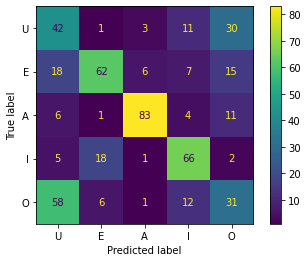

In [15]:
conf_mat_kmeans = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_lab, np.asarray(df['VOY_PRED']), labels=['U', 'E', 'A', 'I', 'O']), display_labels=['U', 'E', 'A', 'I', 'O'])
conf_mat_kmeans.plot()

In [17]:
errors=[]
for i in range(len(test_lab)):
    if test_lab[i] != np.asarray(df['VOY_PRED'][i]):
        errors.append(i)
errors[:10]
#len(errors)

[6, 8, 10, 11, 12, 14, 15, 18, 19, 22]

TRUE :  O
PRED:  U


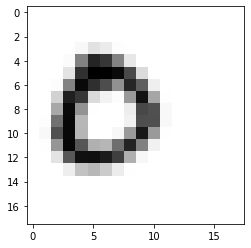

In [28]:
print("TRUE : ", test_lab[6])
print("PRED: ", np.asarray(df['VOY_PRED'][6]))
plt.imshow(test_voy[6],cmap ="gray")

TRUE :  E
PRED:  U


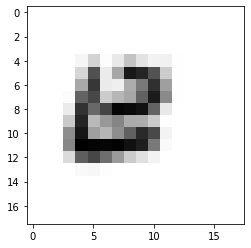

In [29]:
import matplotlib.pyplot as plt
print("TRUE : ", test_lab[8])
print("PRED: ", np.asarray(df['VOY_PRED'][8]))
plt.imshow(test_voy[8],cmap ="gray")

In [31]:
model_knn=KNeighborsClassifier(n_neighbors=5)

In [32]:
model_knn.fit(train_voy_re,train_lab)
pred_knn=model_knn.predict(test_voy_re)
print(classification_report(test_lab, pred_knn))

              precision    recall  f1-score   support

           A       1.00      0.98      0.99       105
           E       0.97      0.96      0.97       108
           I       0.96      0.98      0.97        92
           O       0.95      0.98      0.97       108
           U       0.98      0.95      0.97        87

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



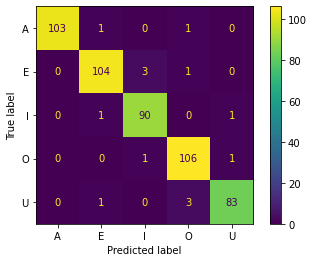

In [33]:
conf_mat_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_lab, pred_knn, labels=['A','E','I','O','U']), display_labels=['A','E','I','O','U'])
conf_mat_knn.plot()

In [37]:
errors=[]
for i in range(len(test_lab)):
    if test_lab[i] != pred_knn[i]:
        errors.append(i)
errors
#len(errors)

[12, 64, 124, 145, 163, 331, 338, 372, 375, 411, 413, 479, 480, 483]

TRUE VALUE :  I
PREDICTION:  U


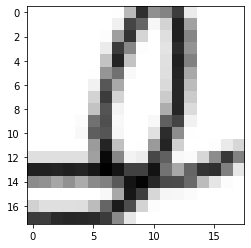

In [102]:
print("TRUE : ", test_lab[12])
print("PRED: ", pred_knn[12])
plt.imshow(test_voy[12],cmap ="gray")

TRUE :  E
PRED:  O


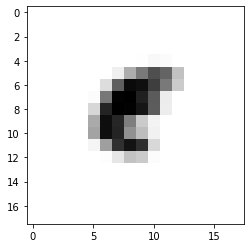

In [35]:
print("TRUE : ", test_lab[64])
print("PRED: ", pred_knn[64])
plt.imshow(test_voy[64],cmap ="gray")